# Regression

## Data Set  
[House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

| Attribute     | Description | 
| :---          | :---  |
| id            | Unique identifier  |
| date          | Date house was sold   |
| price         | Price (prediction,)  |
| bedrooms      | Number of bedrooms  |
| bathrooms     | Number of bathrooms   |
| sqft_living   | Square footage of the home  |
| sqft_lot      | Square footage of the lot  |
| floors        | Number of floors (levels) in the house   |
| waterfront    | Has a view to a waterfront  |
| view          | Has been viewed  |
| condition     | How good the overal condition is   |
| grade         | Overall grade given to the housing unit, based on King County grading system  |
| sqft_above    | Square footage of house apart from basement   |
| sqft_basement | Square footage of the basement  |
| yr_built      | Built year  |
| yr_renovated  | Year when the house was renovated |
| zipcode       | Zipcode |
| lat           | Latitude coordinate  |
| long          | Longitude coordinate   |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | Lot Size area in 2015(implies-- some renovations)  |

### Problem 
    Predict price of a house

### Notes
    Techniques : LinearRegression, Ridge (regularization), Lasso (regularization and selection), ElasticNet, Cross Validation
    Metrics    : Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R-squared
    
### References
   1. [Scikit Generalized Linear Models](https://scikit-learn.org/stable/modules/linear_model.html)
   1. [Location-Centered House Price Prediction: A Multi-Task Learning Approach](https://arxiv.org/pdf/1901.01774.pdf)
   1. [Novelty and Outlier Detection](https://scikit-learn.org/stable/modules/outlier_detection.html)

In [1]:
import numpy as np
import pandas as pd
import datetime
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sb
# scikit-learn imports
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import HuberRegressor
%matplotlib inline

In [2]:
df = pd.read_csv('./data/kc_house_data.csv')

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


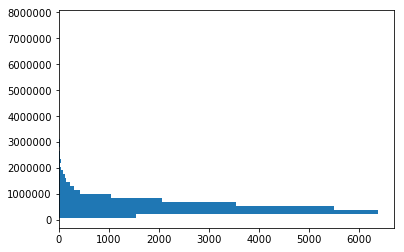

In [7]:
rt=plt.hist(df.price,bins=50,orientation='horizontal')

In [8]:
df_date_year = df['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y%m%dT%H%M%S').year)
df_date_year.value_counts()

2014    14633
2015     6980
Name: date, dtype: int64

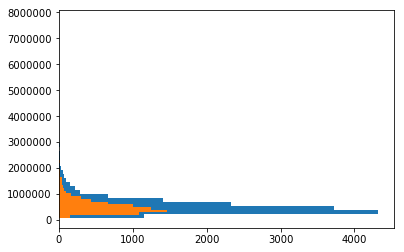

In [9]:
rt=plt.hist(df[df_date_year==2014].price,bins=50,orientation='horizontal')
rt=plt.hist(df[df_date_year==2015].price,bins=50,orientation='horizontal')

In [10]:
df.bathrooms.value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

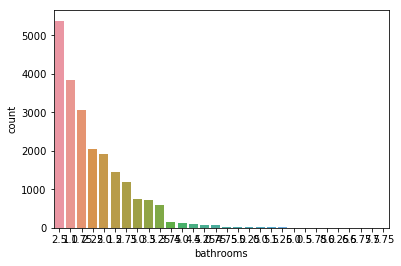

In [11]:
sb.countplot(df.bathrooms,order=df.bathrooms.value_counts().index)

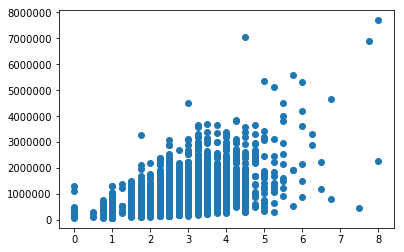

In [12]:
plt.scatter(df.bathrooms,df.price)

In [13]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

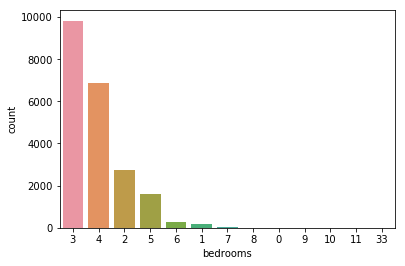

In [14]:
sb.countplot(df.bedrooms,order=df.bedrooms.value_counts().index)

In [15]:
df[df['bedrooms']>9]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


House 8757 has 3000 sqft_living space with 11 bedrooms.<br>
House 15870 has 1620 sqft_living space with 33 bedrooms.<br>

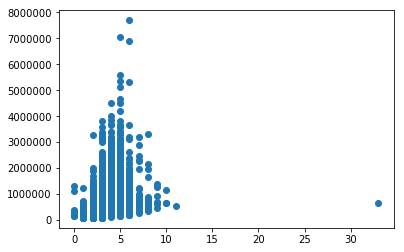

In [16]:
plt.scatter(df.bedrooms,df.price)

In [17]:
df.floors.value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

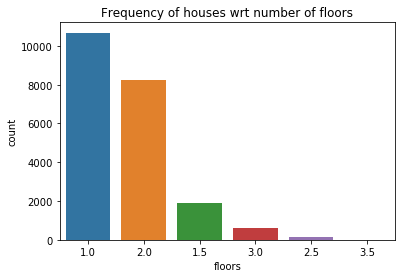

In [18]:
sb.countplot(df.floors,order=df.floors.value_counts().index)
plt.title('Frequency of houses wrt number of floors')

In [19]:
df[df['floors']>3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
10077,1972202010,20140801T000000,435000.0,3,3.00,1440,1350,3.5,0,2,...,8,1440,0,2005,0,98103,47.6525,-122.345,1440,1350
11594,3180100023,20150130T000000,544000.0,3,2.50,1760,1755,3.5,0,0,...,8,1760,0,1998,0,98105,47.6688,-122.279,1700,1721
14885,8673400177,20150402T000000,525000.0,3,3.00,1730,1074,3.5,0,0,...,8,1730,0,2006,0,98107,47.6692,-122.392,1370,1185
15424,1702900664,20150416T000000,479000.0,2,2.50,1730,1037,3.5,0,0,...,8,1730,0,2008,0,98118,47.5594,-122.285,1280,1026
18477,1346300150,20141020T000000,3300000.0,8,4.00,7710,11750,3.5,0,0,...,12,6090,1620,1904,0,98112,47.6263,-122.314,4210,8325
20308,1972200426,20140918T000000,525000.0,2,2.75,1310,1268,3.5,0,0,...,8,1310,0,2007,0,98103,47.6534,-122.355,1350,1288
20772,1972200428,20140625T000000,563500.0,3,2.50,1400,1312,3.5,0,0,...,8,1400,0,2007,0,98103,47.6534,-122.355,1350,1312


In [20]:
print(df[df.sqft_lot<df.sqft_living].count()['id'],'houses have more sqft_living than sqft_lot.')

789 houses have more sqft_living than sqft_lot.


In [21]:
df.grade.value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

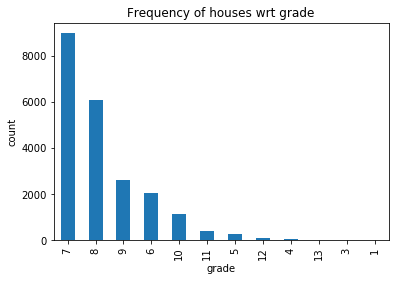

In [22]:
df.grade.value_counts().plot(kind='bar')
plt.xlabel('grade')
plt.ylabel('count')
plt.title('Frequency of houses wrt grade')

To reduce variables, can we drop lat and long (location related) columns because these houses are located in the same area?

In [23]:
df['lat'].describe()

count    21613.000000
mean        47.560053
std          0.138564
min         47.155900
25%         47.471000
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

In [24]:
df['long'].describe()

count    21613.000000
mean      -122.213896
std          0.140828
min       -122.519000
25%       -122.328000
50%       -122.230000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

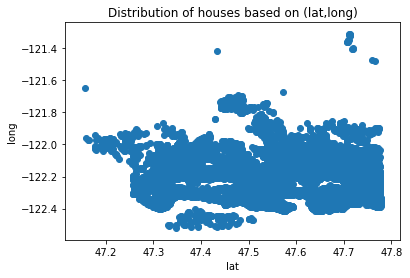

In [25]:
plt.scatter(df['lat'],df['long'])
plt.title('Distribution of houses based on (lat,long)')
plt.xlabel('lat')
plt.ylabel('long')

There are some houses, outside of the area. 

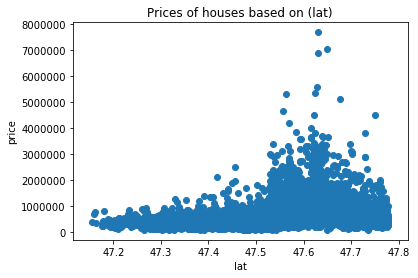

In [26]:
plt.scatter(df['lat'],df['price'])
plt.title('Prices of houses based on (lat)')
plt.xlabel('lat')
plt.ylabel('price')

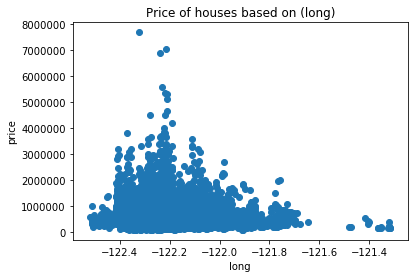

In [27]:
plt.scatter(df['long'],df['price'])
plt.title('Price of houses based on (long)')
plt.xlabel('long')
plt.ylabel('price')

The price of a house in the middle (around mean(lat) and mean(long)) maybe higher. We need to look at 3D plot to check correlation between location (lat,long) and price.

In [28]:
from mpl_toolkits.mplot3d import Axes3D

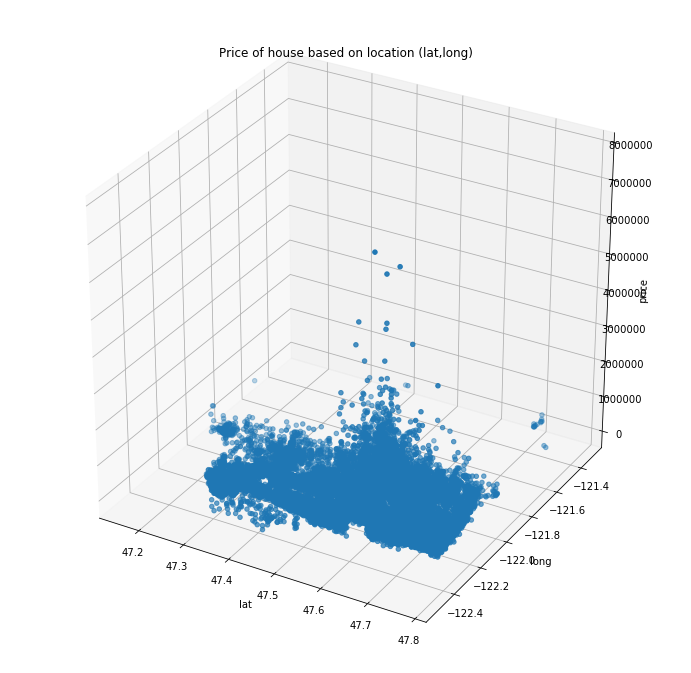

In [29]:
fig = plt.figure(figsize=(12,12))
ax3d = fig.add_subplot(111, projection='3d')
ax3d.scatter(df['lat'],df['long'],df['price'])
ax3d.set_title('Price of house based on location (lat,long)')
ax3d.set_xlabel('lat')
ax3d.set_ylabel('long')
ax3d.set_zlabel('price')
plt.show()

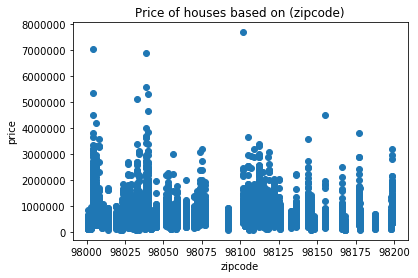

In [30]:
plt.scatter(df['zipcode'],df['price'])
plt.title('Price of houses based on (zipcode)')
plt.xlabel('zipcode')
plt.ylabel('price')

Price of some houses are very high compared to rest of the data points.   

In [31]:
df[df['price']>5000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [32]:
colnames = ['lat', 'long', 'sqft_lot','sqft_living', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition',
            'grade','yr_built', 'yr_renovated','price']
data = df[colnames]

In [33]:
data.describe()

,lat,long,sqft_lot,sqft_living,sqft_basement,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,yr_renovated,price
count,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,47.560053,-122.213896,1.510697e+04,2079.899736,291.509045,3.370842,2.114757,1.494309,0.007542,3.409430,7.656873,1971.005136,84.402258,5.400881e+05
std,0.138564,0.140828,4.142051e+04,918.440897,442.575043,0.930062,0.770163,0.539989,0.086517,0.650743,1.175459,29.373411,401.679240,3.671272e+05
min,47.155900,-122.519000,5.200000e+02,290.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,7.500000e+04
25%,47.471000,-122.328000,5.040000e+03,1427.000000,0.000000,3.000000,1.750000,1.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,3.219500e+05
50%,47.571800,-122.230000,7.618000e+03,1910.000000,0.000000,3.000000,2.250000,1.500000,0.000000,3.000000,7.000000,1975.000000,0.000000,4.500000e+05
75%,47.678000,-122.125000,1.068800e+04,2550.000000,560.000000,4.000000,2.500000,2.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,6.450000e+05
max,47.777600,-121.315000,1.651359e+06,13540.000000,4820.000000,33.000000,8.000000,3.500000,1.000000,5.000000,13.000000,2015.000000,2015.000000,7.700000e+06


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
lat              21613 non-null float64
long             21613 non-null float64
sqft_lot         21613 non-null int64
sqft_living      21613 non-null int64
sqft_basement    21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
floors           21613 non-null float64
waterfront       21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
price            21613 non-null float64
dtypes: float64(5), int64(9)
memory usage: 2.3 MB


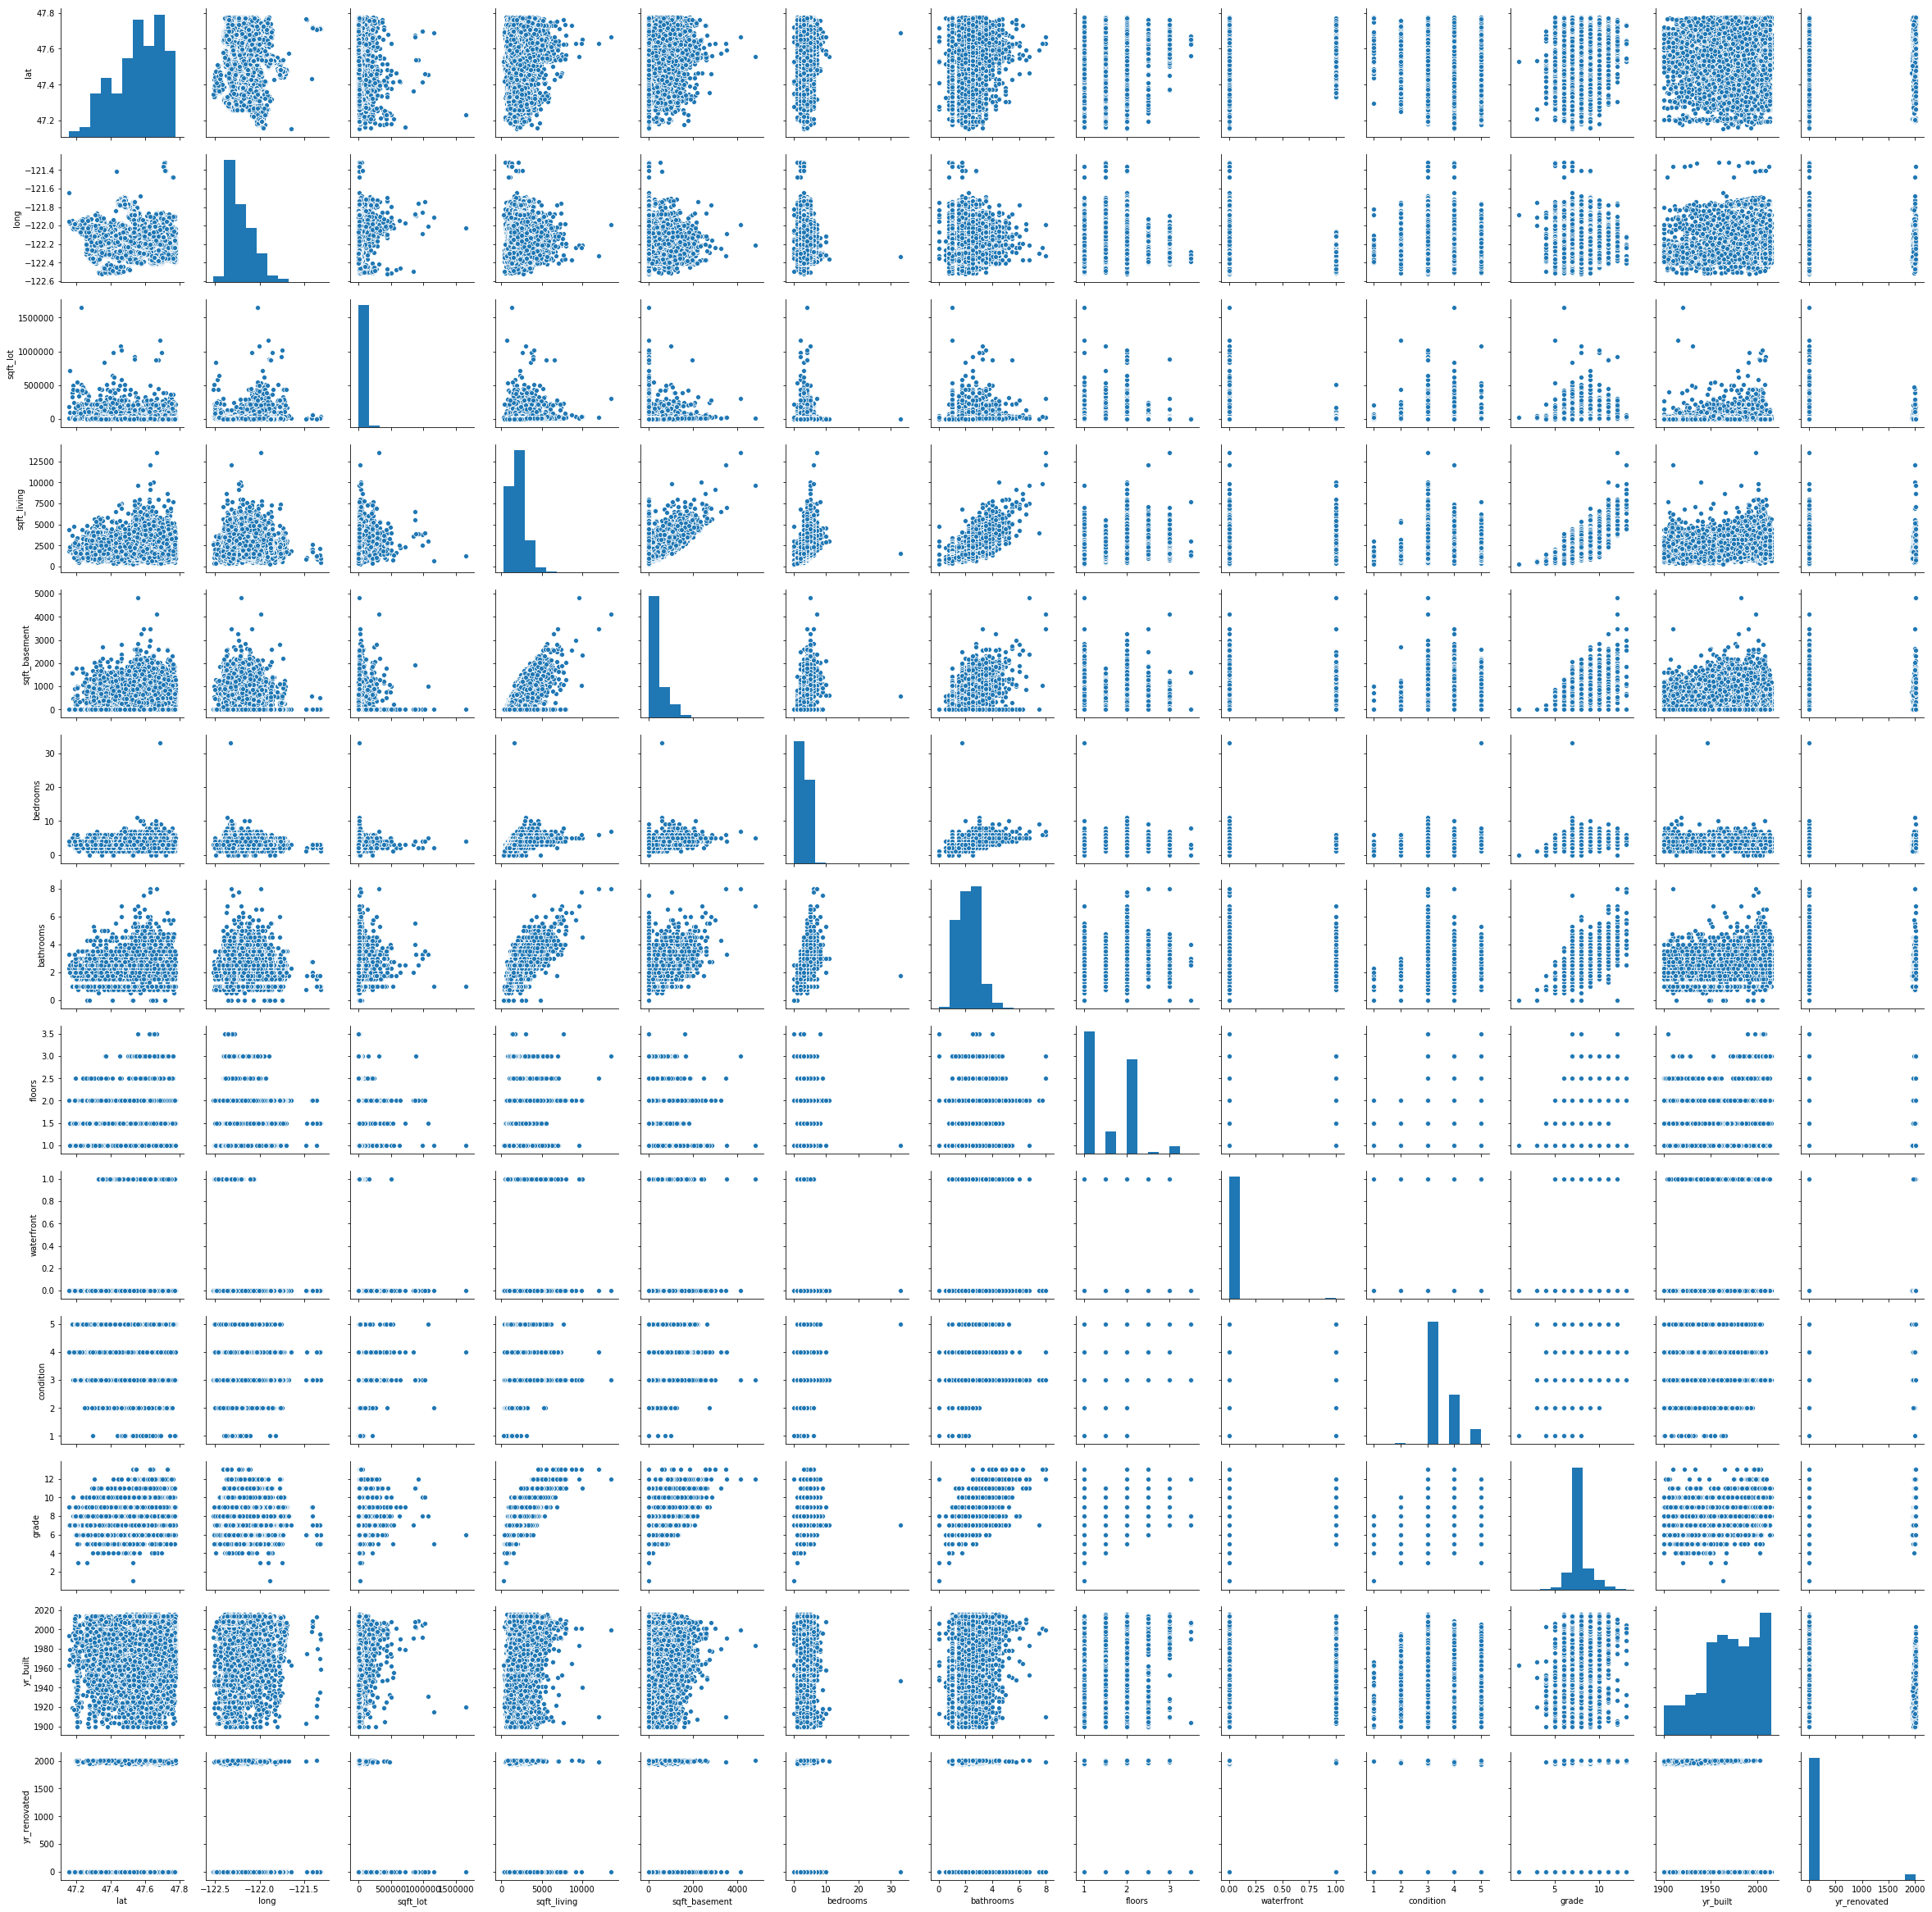

In [35]:
sb.pairplot(data.drop('price',axis=1))

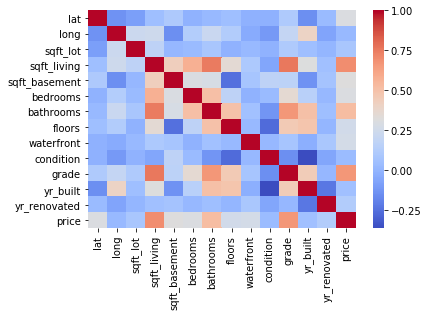

In [36]:
sb.heatmap(data.corr(),cmap='coolwarm')

In [37]:
X = data.drop('price',axis=1)
y = data[['price']]

In [38]:
X.shape

(21613, 13)

In [39]:
y.shape

(21613, 1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
print('\nTraining Data')
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)
print('\nTesting Data')
print('X_test.shape =',X_test.shape)
print('y_test.shape =',y_test.shape)
print('\n')


Training Data
X_train.shape = (15129, 13)
y_train.shape = (15129, 1)

Testing Data
X_test.shape = (6484, 13)
y_test.shape = (6484, 1)




## Linear Regression

In [42]:
lnr = LinearRegression()

In [43]:
lnr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
lnr.coef_

array([[  5.46037077e+05,  -1.23753133e+05,   1.24437659e-02,
          1.95408248e+02,  -2.26757664e+01,  -3.90361901e+04,
          3.74683701e+04,   3.92912233e+03,   7.05872462e+05,
          3.17417997e+04,   1.09645441e+05,  -2.64357666e+03,
          2.11492264e+01]])

In [45]:
lnr.intercept_

array([-36651500.57542495])

## Predict test data for evaluating the model

In [46]:
predictions = lnr.predict(X_test)

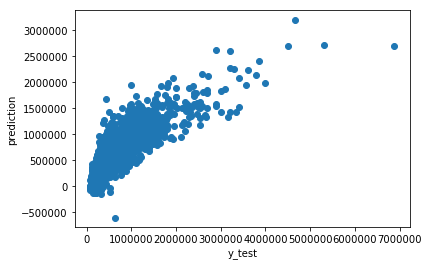

In [47]:
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('prediction')

In [48]:
predictions.min()

-609377.17695790529

In [49]:
def print_metrics(y,pred):
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('{0:.2f}% of variance in data is explained!'.format(metrics.explained_variance_score(y_test, predictions)*100))

In [50]:
print('Evaluation of model by LinearRegression')
print('Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R-squared')
print_metrics(y_test,predictions)

Evaluation of model by LinearRegression
Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R-squared
MAE: 129569.231264
MSE: 42944718953.1
RMSE: 207231.076224
69.39% of variance in data is explained!


In [51]:
# just checking
lnr = LinearRegression(normalize=True)
lnr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [52]:
lnr.coef_

array([[  5.46037077e+05,  -1.23753133e+05,   1.24437659e-02,
          1.95408248e+02,  -2.26757664e+01,  -3.90361901e+04,
          3.74683701e+04,   3.92912233e+03,   7.05872462e+05,
          3.17417997e+04,   1.09645441e+05,  -2.64357666e+03,
          2.11492264e+01]])

In [53]:
lnr.intercept_

array([-36651500.57567853])

In [54]:
predictions = lnr.predict(X_test)

In [55]:
print_metrics(y_test,predictions)

MAE: 129569.231264
MSE: 42944718953.1
RMSE: 207231.076224
69.39% of variance in data is explained!


In [56]:
coeff_df = pd.DataFrame(lnr.coef_.reshape(13,1),X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
lat,546037.077143
long,-123753.133493
sqft_lot,0.012444
sqft_living,195.408248
sqft_basement,-22.675766
bedrooms,-39036.190142
bathrooms,37468.370088
floors,3929.122326
waterfront,705872.462283
condition,31741.799661


## Ridge

In [57]:
lr_ridge = Ridge(alpha=3.0)

In [58]:
lr_ridge.fit(X_train,y_train)

Ridge(alpha=3.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

## Predict test data for evaluating the model

In [59]:
predictions = lr_ridge.predict(X_test)

In [60]:
print('Evaluation of model by Ridge')
print('Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R-squared')
print_metrics(y_test,predictions)

Evaluation of model by Ridge
Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R-squared
MAE: 129587.817941
MSE: 42981566915.4
RMSE: 207319.962655
69.36% of variance in data is explained!


In [61]:
coeff_ridge = pd.DataFrame(lr_ridge.coef_.reshape(13,1),X.columns,columns=['Coefficient'])
coeff_ridge

,Coefficient
lat,539359.528169
long,-122838.062814
sqft_lot,0.010505
sqft_living,195.420931
sqft_basement,-22.103647
bedrooms,-39262.905650
bathrooms,37485.306936
floors,4287.007955
waterfront,687087.430278
condition,31648.083396


In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
# just checking
sscaler = StandardScaler()

In [64]:
sscaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [65]:
scaled_X_train = sscaler.transform(X_train)

In [66]:
pd.DataFrame(scaled_X_train,columns=X_train.columns).describe()

,lat,long,sqft_lot,sqft_living,sqft_basement,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,yr_renovated
count,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04
mean,1.087160e-14,-9.042054e-15,1.596831e-17,6.434289e-17,-3.005799e-17,1.897411e-16,-1.371396e-16,5.541942e-17,5.635873e-18,-3.052765e-17,3.005799e-17,-1.767786e-15,-2.254349e-17
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.921782e+00,-2.164933e+00,-3.414519e-01,-1.958973e+00,-6.579501e-01,-3.712255e+00,-2.749184e+00,-9.192791e-01,-8.790129e-02,-3.718263e+00,-5.688990e+00,-2.409624e+00,-2.110190e-01
25%,-6.426249e-01,-8.048754e-01,-2.369542e-01,-7.215204e-01,-6.579501e-01,-4.066220e-01,-4.764282e-01,-9.192791e-01,-8.790129e-02,-6.274058e-01,-5.598979e-01,-6.800940e-01,-2.110190e-01
50%,7.608032e-02,-1.248468e-01,-1.771915e-01,-1.849259e-01,-6.579501e-01,-4.066220e-01,1.729306e-01,6.363064e-03,-8.790129e-02,-6.274058e-01,-5.598979e-01,1.338024e-01,-2.110190e-01
75%,8.534111e-01,6.260181e-01,-1.071554e-01,5.159323e-01,5.929847e-01,6.952558e-01,4.976100e-01,9.320053e-01,-8.790129e-02,9.180228e-01,2.949507e-01,8.798741e-01,-2.110190e-01
max,1.577907e+00,6.363759e+00,3.794280e+01,1.255098e+01,8.735434e+00,8.408401e+00,7.640557e+00,3.708932e+00,1.137640e+01,2.463451e+00,4.569194e+00,1.490296e+00,4.786561e+00


## Ridge

In [67]:
lr_ridge = Ridge(alpha=1.0)
lr_ridge.fit(scaled_X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

## Predict test data for evaluating the model

In [68]:
predictions = lr_ridge.predict(sscaler.transform(X_test))

In [69]:
print_metrics(y_test,predictions)

MAE: 129565.660071
MSE: 42944703557.7
RMSE: 207231.039079
69.39% of variance in data is explained!


In [70]:
coeff_ridge2 = pd.DataFrame(lr_ridge.coef_.reshape(13,1),X.columns,columns=['Coefficient'])
coeff_ridge2

,Coefficient
lat,75440.046347
long,-17466.828693
sqft_lot,540.170693
sqft_living,178402.502273
sqft_basement,-9955.595361
bedrooms,-35413.514658
bathrooms,28856.025642
floors,2128.526426
waterfront,61569.460891
condition,20539.078926


## Lasso

In [71]:
lr_lasso = Lasso(alpha=1.0)
lr_lasso.fit(scaled_X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

## Predict test data for evaluating the model

In [72]:
predictions = lr_lasso.predict(sscaler.transform(X_test))

In [73]:
print('Evaluation of model by Lasso')
print('Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R-squared')
print_metrics(y_test,predictions)

Evaluation of model by Lasso
Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R-squared
MAE: 129568.815658
MSE: 42944710429.8
RMSE: 207231.05566
69.39% of variance in data is explained!


In [74]:
coeff_lasso = pd.DataFrame(lr_lasso.coef_.reshape(13,1),X.columns,columns=['Coefficient'])
coeff_lasso

,Coefficient
lat,75442.477338
long,-17468.826989
sqft_lot,535.612243
sqft_living,178437.306446
sqft_basement,-9966.958225
bedrooms,-35424.442929
bathrooms,28847.885271
floors,2122.438769
waterfront,61570.762382
condition,20537.906563


Plot histogram of residuals

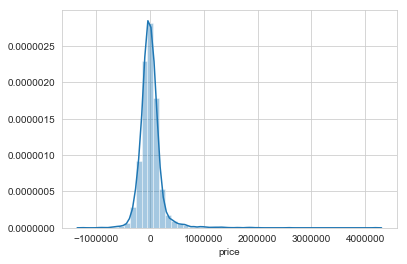

In [75]:
sb.set_style('whitegrid')
sb.distplot(y_test.price-predictions,bins=50)

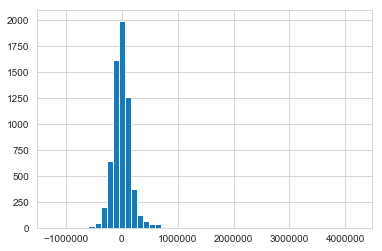

In [76]:
ret = plt.hist(y_test.price-predictions,bins=50)

## ElasticNet

In [77]:
lr_enet = ElasticNet(alpha=1.0,random_state=0)
lr_enet.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

## Predict test data for evaluating the model

In [78]:
predictions = lr_enet.predict(X_test)

In [79]:
print('ElasticNet model evaluation')
print('Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R-squared')
print_metrics(y_test,predictions)

ElasticNet model evaluation
Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R-squared
MAE: 147397.82906
MSE: 54538627303.0
RMSE: 233535.066538
61.12% of variance in data is explained!


In [80]:
coeff_enet = pd.DataFrame(lr_enet.coef_.reshape(13,1),X.columns,columns=['Coefficient'])
coeff_enet

,Coefficient
lat,20368.706195
long,-6590.649071
sqft_lot,-0.217819
sqft_living,249.967005
sqft_basement,-9.459941
bedrooms,-28831.697456
bathrooms,14096.457699
floors,13411.538453
waterfront,10536.016078
condition,8787.531115


## ElasticNet with Cross Validation

In [81]:
lr_enet_10fdcv = ElasticNetCV(l1_ratio=0.9,random_state=0,cv=10)
lr_enet_10fdcv.fit(X_train,y_train.price)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=0.9, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

## Predict test data for evaluating the model

In [82]:
predictions = lr_enet_10fdcv.predict(X_test)

In [83]:
print('ElasticNet (with 10 fold CV) model evaluation')
print('Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R-squared')
print_metrics(y_test.price,predictions)

ElasticNet (with 10 fold CV) model evaluation
Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R-squared
MAE: 168447.768418
MSE: 70263158627.8
RMSE: 265071.987633
49.91% of variance in data is explained!


In [84]:
coeff_enet_10fdcv = pd.DataFrame(lr_enet_10fdcv.coef_.reshape(13,1),X.columns,columns=['Coefficient'])
coeff_enet_10fdcv

,Coefficient
lat,0.000000
long,-0.000000
sqft_lot,-0.054709
sqft_living,227.341887
sqft_basement,26.224326
bedrooms,-0.000000
bathrooms,0.000000
floors,0.000000
waterfront,0.000000
condition,0.000000


## HuberRegressor

In [85]:
lr_huber = HuberRegressor()
lr_huber.fit(X_train,y_train.price)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)

## Predict test data for evaluating the model

In [86]:
predictions = lr_huber.predict(X_test)

In [87]:
print('HuberRegressor model evaluation')
print('Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R-squared')
print_metrics(y_test.price,predictions)

HuberRegressor model evaluation
Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R-squared
MAE: 166324.969433
MSE: 73113961431.3
RMSE: 270395.934569
48.87% of variance in data is explained!


In [88]:
lr_huber.coef_

array([  1.06218534e+00,  -2.27576043e+00,  -1.04128462e-01,
         2.16466602e+02,   5.29653258e+00,  -1.19731804e-01,
         1.73482155e-01,   2.14522034e-01,   2.10352314e-02,
         1.95171084e-01,   1.03684046e+00,   2.42062479e+01,
         5.99524931e+01])

In [89]:
pd.concat([coeff_df,coeff_ridge,coeff_ridge2,coeff_lasso,coeff_enet],axis=1)

,Coefficient,Coefficient,Coefficient,Coefficient,Coefficient
lat,546037.077143,539359.528169,75440.046347,75442.477338,20368.706195
long,-123753.133493,-122838.062814,-17466.828693,-17468.826989,-6590.649071
sqft_lot,0.012444,0.010505,540.170693,535.612243,-0.217819
sqft_living,195.408248,195.420931,178402.502273,178437.306446,249.967005
sqft_basement,-22.675766,-22.103647,-9955.595361,-9966.958225,-9.459941
bedrooms,-39036.190142,-39262.905650,-35413.514658,-35424.442929,-28831.697456
bathrooms,37468.370088,37485.306936,28856.025642,28847.885271,14096.457699
floors,3929.122326,4287.007955,2128.526426,2122.438769,13411.538453
waterfront,705872.462283,687087.430278,61569.460891,61570.762382,10536.016078
condition,31741.799661,31648.083396,20539.078926,20537.906563,8787.531115


Let's add variables one by one to see how R-squared metric improves

In [90]:
colnames = ['sqft_lot','sqft_living', 'sqft_basement', 'bedrooms','price']

X = data[colnames[:-1]]
y = data[['price']]

In [91]:
X.head()

,sqft_lot,sqft_living,sqft_basement,bedrooms
0,5650,1180,0,3
1,7242,2570,400,3
2,10000,770,0,2
3,5000,1960,910,4
4,8080,1680,0,3


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [93]:
lnr = LinearRegression(normalize=True)
lnr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [94]:
predictions = lnr.predict(X_test)

In [95]:
print_metrics(y_test,predictions)

MAE: 168684.669998
MSE: 66635896319.3
RMSE: 258139.296348
52.50% of variance in data is explained!


In [96]:
colnames = ['sqft_lot','sqft_living', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition',
            'grade','price']

X = data[colnames[:-1]]
y = data[['price']]

In [97]:
X.head()

,sqft_lot,sqft_living,sqft_basement,bedrooms,bathrooms,floors,waterfront,condition,grade
0,5650,1180,0,3,1.00,1.0,0,3,7
1,7242,2570,400,3,2.25,2.0,0,3,7
2,10000,770,0,2,1.00,1.0,0,3,6
3,5000,1960,910,4,3.00,1.0,0,5,7
4,8080,1680,0,3,2.00,1.0,0,3,8


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [99]:
lnr = LinearRegression(normalize=True)
lnr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [100]:
predictions = lnr.predict(X_test)

In [101]:
print_metrics(y_test,predictions)

MAE: 154916.361194
MSE: 55259522474.7
RMSE: 235073.440598
60.61% of variance in data is explained!


In [102]:
colnames = ['lat', 'sqft_lot','sqft_living', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition',
            'grade','price']

X = data[colnames[:-1]]
y = data[['price']]

In [103]:
X.head()

,lat,sqft_lot,sqft_living,sqft_basement,bedrooms,bathrooms,floors,waterfront,condition,grade
0,47.5112,5650,1180,0,3,1.00,1.0,0,3,7
1,47.7210,7242,2570,400,3,2.25,2.0,0,3,7
2,47.7379,10000,770,0,2,1.00,1.0,0,3,6
3,47.5208,5000,1960,910,4,3.00,1.0,0,5,7
4,47.6168,8080,1680,0,3,2.00,1.0,0,3,8


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [105]:
lnr = LinearRegression(normalize=True)
lnr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [106]:
predictions = lnr.predict(X_test)

In [107]:
print_metrics(y_test,predictions)

MAE: 136870.450323
MSE: 47195006019.5
RMSE: 217244.116191
66.36% of variance in data is explained!


In [108]:
colnames = ['lat', 'sqft_lot','sqft_living', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition',
            'grade','yr_renovated','price']

X = data[colnames[:-1]]
y = data[['price']]

In [109]:
X.head()

,lat,sqft_lot,sqft_living,sqft_basement,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_renovated
0,47.5112,5650,1180,0,3,1.00,1.0,0,3,7,0
1,47.7210,7242,2570,400,3,2.25,2.0,0,3,7,1991
2,47.7379,10000,770,0,2,1.00,1.0,0,3,6,0
3,47.5208,5000,1960,910,4,3.00,1.0,0,5,7,0
4,47.6168,8080,1680,0,3,2.00,1.0,0,3,8,0


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [111]:
lnr = LinearRegression(normalize=True)
lnr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [112]:
predictions = lnr.predict(X_test)

In [113]:
print_metrics(y_test,predictions)

MAE: 135427.669816
MSE: 46408876605.0
RMSE: 215427.195602
66.92% of variance in data is explained!
